# **Pytorch & Torchtext**

In [1]:
!pip install -q torchtext==0.16.0

In [2]:
# INDEX-BASED REPRESENTATION
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()

{'food': 5, 'eats': 4, 'bites': 3, 'meat': 6, 'man': 2, 'dog': 1, '<unk>': 0}

In [3]:
vocab(tokenizer("dog bites man"))

[1, 3, 2]

In [4]:
vocab(tokenizer("dog and man"))

[1, 0, 2]

In [5]:
# PADDING
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()['<pad>']

0

In [6]:
from torchtext.transforms import PadTransform

# define padding
max_len = 4
pad_id = vocab.get_stoi()['<pad>']
padder = PadTransform(max_len, pad_id)

input = torch.tensor([2, 4, 3])
padded_input = padder(input)
padded_input

tensor([2, 4, 3, 0])

In [7]:
# TRUNCATING
from torchtext.transforms import Truncate

# define padding
max_len = 3
truncater = Truncate(max_len)

input = [2, 2, 4, 3]
truncated_input = truncater(input)
truncated_input

[2, 2, 4]

## **Embedding Layer**

In [8]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 3
embedding = nn.Embedding(vocab_size, embedding_dim)
embedding.weight

Parameter containing:
tensor([[-0.8023, -0.8777, -0.5618],
        [-0.9383,  1.6100, -0.2743],
        [ 1.6214,  0.0993, -0.5165],
        [-0.8033, -0.1543, -0.5699],
        [ 1.6220,  0.3601,  0.6154],
        [-1.5995, -1.0693,  0.4604],
        [-0.6484, -2.1606, -0.1376]], requires_grad=True)

In [9]:
import torch

input = torch.LongTensor([[1, 2, 4], [4, 3, 2]])
embedding(input)

tensor([[[-0.9383,  1.6100, -0.2743],
         [ 1.6214,  0.0993, -0.5165],
         [ 1.6220,  0.3601,  0.6154]],

        [[ 1.6220,  0.3601,  0.6154],
         [-0.8033, -0.1543, -0.5699],
         [ 1.6214,  0.0993, -0.5165]]], grad_fn=<EmbeddingBackward0>)

## **EmbeddingBag**

In [10]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='sum')
embedding_sum.weight

Parameter containing:
tensor([[-0.8795, -1.8475, -0.1042,  2.2073],
        [ 0.9040,  1.4865,  0.8926,  1.7301],
        [-0.0581,  1.0069, -0.2214,  0.6661],
        [ 0.9656,  0.4063, -1.5906, -0.7467],
        [ 2.0428,  1.1442,  0.2039, -0.1650],
        [-0.3378,  0.1840, -0.6213, -0.3929],
        [ 1.9371, -0.6548, -1.3834,  0.3718]], requires_grad=True)

In [11]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[ 2.8887,  3.6375,  0.8752,  2.2311],
        [ 2.6706,  1.7345, -2.0080, -1.3047]], grad_fn=<EmbeddingBagBackward0>)

In [12]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='mean')
embedding_sum.weight

Parameter containing:
tensor([[-1.0450, -0.6092, -0.3927, -0.1212],
        [ 0.5844,  0.1727, -0.5250, -0.1411],
        [ 1.2199,  0.4313, -2.3134,  0.3019],
        [-1.1636, -0.5926, -1.4048,  0.3985],
        [-1.4614, -1.4325,  0.7454, -0.8527],
        [-0.5430, -1.1084,  2.0772, -2.2811],
        [-0.7150,  0.3311, -0.1883,  0.6665]], requires_grad=True)

In [13]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[ 0.1143, -0.2762, -0.6977, -0.2306],
        [-1.0560, -1.0445,  0.4726, -0.9118]], grad_fn=<EmbeddingBagBackward0>)

# **Text Classification**

In [14]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35
Receiving objects: 100% (39/39), 186.94 MiB | 38.49 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [15]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

Streaming output truncated to the last 5000 lines.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31273.tx

In [16]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [17]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

In [18]:
train_df.head(5)

,sentence,label
0,Mình và người_yêu ăn cũng nhiều lần rồi . Quán...,0
1,Ai có ý_định ăn thử Bánh_Canh_Bò ở muối ớt xan...,0
2,Nem của quán ngon tuy_nhiên nhân_viên thái_độ ...,0
3,Nghe mấy người trong hẻm nói quán đã dời đi nh...,0
4,"Đồ_ăn bình_thường , giá_cả k phù_hợp với chất_...",0


## **Language Detection**

In [19]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941173 sha256=e42f2345b2c2feccc2c96cf7cb7a18b1b9f7905fc83d5bc3a4c87b374dd1c794
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [20]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [21]:
train_df_vi, train_df_other = identify_vn(train_df)

In [22]:
train_df_vi

,sentence,label
0,Mình và người_yêu ăn cũng nhiều lần rồi . Quán...,0
1,Ai có ý_định ăn thử Bánh_Canh_Bò ở muối ớt xan...,0
2,Nem của quán ngon tuy_nhiên nhân_viên thái_độ ...,0
3,Nghe mấy người trong hẻm nói quán đã dời đi nh...,0
4,"Đồ_ăn bình_thường , giá_cả k phù_hợp với chất_...",0
...,...,...
29995,"Nhà_hàng mát_mẻ , nhân_viên thân_thiện , phục_...",1
29996,Tiệm banh ở đây khá ngon . Nhìn đẹp_mắt . Nhân...,1
29997,"Hôm_nay mới ghé quán , nói thiệt là ngon đó , ...",1
29998,Đến qán trúng h đông khách nhưng phục_vụ rất n...,1


In [23]:
train_df_other

,sentence,label
102,"Nhom minh di an 8 nguoi , ve do an thi cung bi...",0
116,i went here for a small snack around 4pm . it ...,0
335,I went to this restaurant as suggestion from x...,0
557,Quan does not meet the requitements of custome...,0
630,Regarding your parking ! there is who take car...,0
...,...,...
29418,That was delicious . My compliments to the che...,1
29721,I went to eat udon with my vietnamese friends ...,1
29785,I ' ve just known this Coffee_Shop for several...,1
29846,My wife and I had a retrospective wedding phot...,1


In [24]:
import re
import string

def preprocess_text(text):

    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    text = " ".join(text.split())

    return text.lower()

In [25]:
train_df_vi['sentence'][0]

'Mình và người_yêu ăn cũng nhiều lần rồi . Quán này nằm ngay rìa ngoài , trang_trí sang hơn các quán trong foodcourt AEON Mall . Giá hơi cao chút , khoảng 70-80k/phần , cơm 10k dĩa hơi ít được_cái cơm thơm , dẻo , ngon .\n Không hiểu sao quán không còn bán phần đặc_biệt burger bò Mỹ nữa mà chỉ bán bò thường . Lần này mình kêu 2 phần : burger phô_mai và burger bò xào . Bò bằm mềm , vị ngon_ngọt , rất dễ ăn . Có_điều ăn_không có cơm thì bị mặn . Phần ăn cũng hơi nhỏ , không nhiều lắm . Chất_lượng trung_bình , lâu_lâu đổi gió ăn cho vui thì ok .\n Khu ăn_uống này thì nhiều bàn_ghế nhưng đi vào giờ cao_điểm tìm bàn mắc mệt : (\n'

In [26]:
preprocess_text(train_df_vi['sentence'][0])

'mình và người yêu ăn cũng nhiều lần rồi quán này nằm ngay rìa ngoài trang trí sang hơn các quán trong foodcourt aeon mall giá hơi cao chút khoảng k phần cơm k dĩa hơi ít được cái cơm thơm dẻo ngon không hiểu sao quán không còn bán phần đặc biệt burger bò mỹ nữa mà chỉ bán bò thường lần này mình kêu phần burger phô mai và burger bò xào bò bằm mềm vị ngon ngọt rất dễ ăn có điều ăn không có cơm thì bị mặn phần ăn cũng hơi nhỏ không nhiều lắm chất lượng trung bình lâu lâu đổi gió ăn cho vui thì ok khu ăn uống này thì nhiều bàn ghế nhưng đi vào giờ cao điểm tìm bàn mắc mệt'

In [27]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

<ipython-input-27-e21d2b59a2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


In [28]:
train_df

,sentence,label
0,Mình và người_yêu ăn cũng nhiều lần rồi . Quán...,0
1,Ai có ý_định ăn thử Bánh_Canh_Bò ở muối ớt xan...,0
2,Nem của quán ngon tuy_nhiên nhân_viên thái_độ ...,0
3,Nghe mấy người trong hẻm nói quán đã dời đi nh...,0
4,"Đồ_ăn bình_thường , giá_cả k phù_hợp với chất_...",0
...,...,...
29995,"Nhà_hàng mát_mẻ , nhân_viên thân_thiện , phục_...",1
29996,Tiệm banh ở đây khá ngon . Nhìn đẹp_mắt . Nhân...,1
29997,"Hôm_nay mới ghé quán , nói thiệt là ngon đó , ...",1
29998,Đến qán trúng h đông khách nhưng phục_vụ rất n...,1


In [29]:
valid_df

,sentence,label,preprocess_sentence
0,"Nă ̀ m trong he ̉ m đg Phan_Châu_Trinh , qua ́...",0,nă ̀ m trong he ̉ m đg phan châu trinh qua ́ n...
1,_ Nói_chung nghe lạ_lạ đến thử thôi .\n Sữa_ch...,0,nói chung nghe lạ lạ đến thử thôi sữa chua bìn...
2,"Mình mua deal qua nhommua , tắm dưỡng + máy ph...",0,mình mua deal qua nhommua tắm dưỡng máy phi th...
3,"Theo mình thì quánn này không ngon , thức_ăn k...",0,theo mình thì quánn này không ngon thức ăn khó...
4,Mưa với mát trời nên mấy chị_em lại thèm ăn ốc...,0,mưa với mát trời nên mấy chị em lại thèm ăn ốc...
...,...,...,...
9995,Không_gian rạp cgv ở đây là đẹp nhất trong các...,1,không gian rạp cgv ở đây là đẹp nhất trong các...
9996,Thèm đồ Nhật quá nên đánh_liều rủ mấy chị tron...,1,thèm đồ nhật quá nên đánh liều rủ mấy chị tron...
9997,"Không_gian quán là no 1 , thật_ra Rue ' s ko p...",1,không gian quán là no thật ra rue s ko phải là...
9998,* * VỊ_TRÍ : Nằm ở tầng food court chung với k...,1,vị trí nằm ở tầng food court chung với khu vui...


In [30]:
test_df

,sentence,label,preprocess_sentence
0,Món ăn thì ngon đó tiền rẽ nhưng không_thể chấ...,0,món ăn thì ngon đó tiền rẽ nhưng không thể chấ...
1,Lúc mình đến thì k thấy bò bít tết mà là món g...,0,lúc mình đến thì k thấy bò bít tết mà là món g...
2,Quán nêm nếm ngon mỗi_tội đồ_ăn quá ít . Món 1...,0,quán nêm nếm ngon mỗi tội đồ ăn quá ít món k q...
3,Mình theo_dõi foody . Nghe mọi người khen đã r...,0,mình theo dõi foody nghe mọi người khen đã rủ ...
4,"Quán này đợt mới mở mình có đi ăn , thấy ngon_...",0,quán này đợt mới mở mình có đi ăn thấy ngon ăn...
...,...,...,...
9995,"Luôn la ̀ "" tra ̀ sư ̃ a tra ̀ xanh khu ́ c ba...",1,luôn la ̀ tra ̀ sư ̃ a tra ̀ xanh khu ́ c ba ̣...
9996,"Quán nằm trên đường Thạch_Thị_Thanh , dễ tìm ....",1,quán nằm trên đường thạch thị thanh dễ tìm khô...
9997,"Vừa vào quán đã thích ngay rồi , hôm trước ngh...",1,vừa vào quán đã thích ngay rồi hôm trước nghe ...
9998,"Mình thấy đồ_ăn ở đây ok . Ốc , hải_sản tươi ,...",1,mình thấy đồ ăn ở đây ok ốc hải sản tươi nv ph...


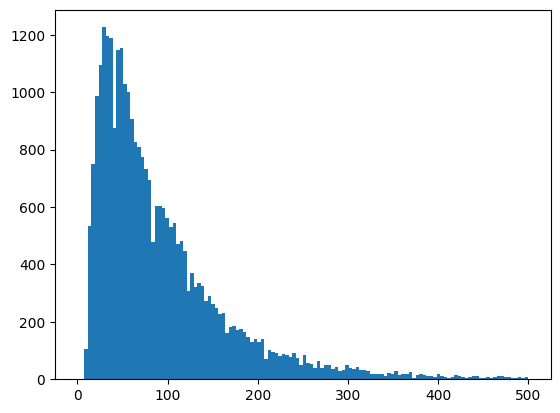

In [31]:
# EDA
import matplotlib.pyplot as plt

plt.hist([len(sentence.split()) for sentence in train_df_vi['preprocess_sentence']], bins=128, range=(0, 500))
plt.show()

In [32]:
# count: words and vocabulary
from collections import Counter

words = []
[[words.append(word) for word in sentence.split()] for sentence in train_df_vi['preprocess_sentence']]
vocabulary = Counter(words)
len(vocabulary), len(words)

(17244, 2856797)

## **Text Representation**

In [33]:
!pip install -q torchtext==0.16.0

In [34]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [35]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [36]:
tokenizer(train_df_vi['preprocess_sentence'][0])[:5]

['mình', 'và', 'người', 'yêu', 'ăn']

In [37]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [38]:
len(vocabulary)

10000

In [39]:
# encode text

print(vocabulary(tokenizer(train_df_vi['preprocess_sentence'][0])))

[2, 8, 63, 408, 1, 9, 46, 40, 65, 6, 35, 297, 204, 5953, 154, 227, 158, 378, 76, 64, 6, 72, 4578, 1537, 2021, 30, 50, 257, 303, 435, 13, 135, 153, 13, 372, 50, 179, 27, 55, 153, 160, 760, 10, 5, 494, 170, 6, 5, 44, 195, 135, 131, 174, 1476, 150, 978, 56, 15, 69, 195, 150, 146, 40, 35, 2, 176, 135, 1476, 371, 321, 8, 1476, 150, 472, 150, 1811, 280, 52, 10, 119, 12, 102, 1, 3, 316, 1, 5, 3, 153, 7, 116, 410, 135, 1, 9, 50, 111, 5, 46, 66, 122, 139, 373, 143, 141, 141, 411, 919, 1, 32, 254, 7, 193, 368, 1, 43, 35, 7, 46, 104, 403, 16, 22, 54, 166, 257, 178, 253, 104, 283, 996]


In [40]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

In [41]:
print(next(iter(train_dataset)))

([2, 8, 63, 408, 1, 9, 46, 40, 65, 6, 35, 297, 204, 5953, 154, 227, 158, 378, 76, 64, 6, 72, 4578, 1537, 2021, 30, 50, 257, 303, 435, 13, 135, 153, 13, 372, 50, 179, 27, 55, 153, 160, 760, 10, 5, 494, 170, 6, 5, 44, 195, 135, 131, 174, 1476, 150, 978, 56, 15, 69, 195, 150, 146, 40, 35, 2, 176, 135, 1476, 371, 321, 8, 1476, 150, 472, 150, 1811, 280, 52, 10, 119, 12, 102, 1, 3, 316, 1, 5, 3, 153, 7, 116, 410, 135, 1, 9, 50, 111, 5, 46, 66, 122, 139, 373, 143, 141, 141, 411, 919, 1, 32, 254, 7, 193, 368, 1, 43, 35, 7, 46, 104, 403, 16, 22, 54, 166, 257, 178, 253, 104, 283, 996], 0)


In [42]:
len(train_dataset)

29736

In [43]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    encoded_sentences, labels, offsets = [], [], [0]
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)
        offsets.append(encoded_sentence.size(0))

    labels = torch.tensor(labels, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    encoded_sentences = torch.cat(encoded_sentences)
    return encoded_sentences.to(device), offsets.to(device), labels.to(device)

In [44]:
from torch.utils.data import DataLoader

batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [45]:
next(iter(train_dataloader))

(tensor([320, 415, 534,  ..., 757, 442, 388], device='cuda:0'),
 tensor([    0,    60,   115,   213,   341,   375,   612,   629,   646,   703,
           771,   885,   921,   946,   993,  1072,  1239,  1405,  1547,  1603,
          1681,  1834,  1890,  2109,  2191,  2211,  2319,  2436,  2685,  2890,
          2914,  2943,  3031,  3116,  3133,  3151,  3289,  3451,  3608,  3691,
          3736,  3907,  3974,  4005,  4171,  4419,  4453,  4476,  4534,  4551,
          4610,  4849,  4942,  5085,  5112,  5143,  5197,  5274,  5377,  5627,
          5824,  5930,  5990,  6045,  6089,  6178,  6234,  6286,  6310,  6389,
          6436,  6576,  6590,  6613,  6757,  6788,  6875,  7034,  7138,  7262,
          7542,  7637,  7724,  7741,  7763,  7801,  7929,  8011,  8030,  8179,
          8225,  8481,  8514,  8557,  8662,  8758,  8805,  8846,  8947,  9006,
          9061,  9171,  9245,  9275,  9323,  9400,  9491,  9568,  9922, 10025,
         10133, 10248, 10355, 10500, 10532, 10610, 10712, 10844, 10

In [46]:
encoded_sentences, offsets, labels = next(iter(train_dataloader))

In [47]:
encoded_sentences.shape

torch.Size([14600])

## **MODEL**

**Embedding**

In [48]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class, seq_len):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.ft = nn.Flatten()
        self.fc = nn.Linear(seq_len*embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, inputs):
        embedded = self.embedding(inputs)
        ouput = self.ft(embedded)
        return self.fc(ouput)

In [49]:
batch_size = 5
seq_len = 10
input = torch.ones([batch_size, seq_len], dtype=torch.int32)
input

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

In [50]:
num_class = 2
vocab_size = 5000
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class, seq_len)

In [51]:
model

TextClassificationModel(
  (embedding): Embedding(5000, 100)
  (ft): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1000, out_features=2, bias=True)
)

In [52]:
predictions = model(input)
predictions

tensor([[1.2776, 3.0725],
        [1.2776, 3.0725],
        [1.2776, 3.0725],
        [1.2776, 3.0725],
        [1.2776, 3.0725]], grad_fn=<AddmmBackward0>)

**EmbeddingBag**

In [53]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, inputs, offsets):
        embedded = self.embedding(inputs, offsets)
        return self.fc(embedded)

In [54]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

In [55]:
model

TextClassificationModel(
  (embedding): EmbeddingBag(10000, 100, mode='mean')
  (fc): Linear(in_features=100, out_features=2, bias=True)
)

In [56]:
predictions = model(encoded_sentences, offsets)

In [57]:
predictions

tensor([[ 3.1614e-02, -7.7539e-02],
        [-1.5971e-02, -4.6168e-02],
        [ 7.6584e-02,  5.6112e-04],
        [ 7.4315e-02, -1.9954e-02],
        [ 1.8635e-01, -9.3690e-02],
        [ 2.7001e-01, -1.1177e-01],
        [ 3.8582e-01,  1.3498e-01],
        [ 2.2641e-01,  7.1694e-02],
        [-8.5517e-02,  4.2587e-02],
        [ 1.3228e-01, -1.2164e-01],
        [ 4.4753e-03, -2.0864e-01],
        [ 2.7008e-01,  1.5108e-01],
        [ 1.4083e-01,  3.0112e-02],
        [ 1.2654e-01, -5.5651e-02],
        [ 1.4036e-01,  7.6335e-02],
        [ 1.9812e-01, -8.4874e-02],
        [ 3.3692e-02,  8.4799e-02],
        [ 1.1556e-01,  1.8102e-01],
        [-2.0243e-01, -4.8145e-02],
        [ 1.4212e-01, -9.1588e-02],
        [ 6.9773e-02,  4.5221e-01],
        [-1.0919e-01, -1.8473e-02],
        [ 2.1308e-01, -1.2234e-01],
        [ 1.2234e-01, -1.6657e-01],
        [-1.0315e-02, -2.2742e-02],
        [ 8.8176e-02, -7.1073e-02],
        [ 7.8461e-02,  6.2014e-02],
        [ 1.3629e-01, -8.133

In [58]:
learning_rate = 2e-5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
loss = criterion(predictions, labels)

In [60]:
loss

tensor(0.7130, device='cuda:0', grad_fn=<NllLossBackward0>)

## **Trainer**

In [61]:
import time

def train(model, optimizer, criterion, train_dataloader, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, offsets, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        predictions = model(inputs, offsets)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [62]:
epoch_acc, epoch_loss = train(model, optimizer, criterion, train_dataloader)

| epoch   0 |    50/  233 batches | accuracy    0.495
| epoch   0 |   100/  233 batches | accuracy    0.486
| epoch   0 |   150/  233 batches | accuracy    0.490
| epoch   0 |   200/  233 batches | accuracy    0.502


In [63]:
epoch_acc, epoch_loss

(0.4945109780439122, 0.6996483048144329)

In [64]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, offsets, labels) in enumerate(valid_dataloader):
            predictions = model(inputs, offsets)
            loss = criterion(predictions, labels)
            losses.append(loss)
            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [65]:
eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)

In [66]:
eval_acc, eval_loss

(0.4885, tensor(0.7008, device='cuda:0'))

## **Training**

In [67]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

learning_rate = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 10
for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    train_acc, train_loss = train(model, optimizer, criterion, train_dataloader, epoch)
    eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

| epoch   1 |    50/  233 batches | accuracy    0.672
| epoch   1 |   100/  233 batches | accuracy    0.803
| epoch   1 |   150/  233 batches | accuracy    0.828
| epoch   1 |   200/  233 batches | accuracy    0.839
-----------------------------------------------------------
| End of epoch   1 | Time:  1.13s | Train Accuracy    0.843 | Train Loss    0.462 | Valid Accuracy    0.848 | Valid Loss    0.391 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.861
| epoch   2 |   100/  233 batches | accuracy    0.859
| epoch   2 |   150/  233 batches | accuracy    0.859
| epoch   2 |   200/  233 batches | accuracy    0.854
-----------------------------------------------------------
| End of epoch   2 | Time:  1.06s | Train Accuracy    0.859 | Train Loss    0.361 | Valid Accuracy    0.865 | Valid Loss    0.364 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.869
| epoch   3 

## **Prediction**

In [68]:
model = model.to('cpu')

In [69]:
def predict(text):
    with torch.no_grad():
        encoded = torch.tensor(vocabulary(tokenizer(text)))
        output = model(encoded, torch.tensor([0]))
        return output.argmax(1).item()

In [70]:
test_df.iloc[0]

sentence               Món ăn thì ngon đó tiền rẽ nhưng không_thể chấ...
label                                                                  0
preprocess_sentence    món ăn thì ngon đó tiền rẽ nhưng không thể chấ...
Name: 0, dtype: object

In [71]:
predict(test_df.iloc[0]['sentence'])

0

In [72]:
# compute accuracy on test set

predictions, labels = [], []
for index, row in test_df.iterrows():
    sentence = row['preprocess_sentence']
    label = row['label']
    prediction = predict(sentence)
    predictions.append(prediction)
    labels.append(label)

sum(torch.tensor(predictions) == torch.tensor(labels))/len(labels)

tensor(0.8765)

## **Compare: BoW, TF-IDF**

In [73]:
import numpy as np

In [74]:
train_labels = np.array(train_df_vi['label'].tolist())
test_labels = np.array(test_df['label'].tolist())

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)

train_sequences = vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = vectorizer.transform(test_df['preprocess_sentence'])
vocab_size = len(vectorizer.vocabulary_)
vocab_size

10000

In [76]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
logreg.score(test_sequences, test_labels)

0.8779

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 10000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

train_sequences = tfidf_vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = tfidf_vectorizer.transform(test_df['preprocess_sentence'])

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

LogisticRegression()

In [80]:
logreg.score(test_sequences, test_labels)

0.8822